In [31]:
import bs4 as bs
import urllib.request
import nltk
import spacy
import textwrap
import matplotlib.pyplot as plt

from spacy.matcher import PhraseMatcher
from IPython.core.display import HTML
from spacy import displacy
from matplotlib.colors import ListedColormap
from wordcloud import WordCloud
from spacy.lang.en.stop_words import STOP_WORDS

### Carregamento dos textos

In [2]:
data = urllib.request.urlopen('https://en.wikipedia.org/wiki/Artificial_intelligence')

In [3]:
data = data.read()
data

b'<!DOCTYPE html>\n<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-custom-font-size-clientpref-1 vector-feature-appearance-pinned-clientpref-1 vector-feature-night-mode-enabled skin-theme-clientpref-day vector-toc-available" lang="en" dir="ltr">\n<head>\n<meta charset="UTF-8">\n<title>Artificial intelligence - Wikipedia</title>\n<script>(function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-client

In [4]:
data_html = bs.BeautifulSoup(data, 'html.parser')
data_html

<!DOCTYPE html>

<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-custom-font-size-clientpref-1 vector-feature-appearance-pinned-clientpref-1 vector-feature-night-mode-enabled skin-theme-clientpref-day vector-toc-available" dir="ltr" lang="en">
<head>
<meta charset="utf-8"/>
<title>Artificial intelligence - Wikipedia</title>
<script>(function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-

In [5]:
paragraphs = data_html.find_all('p')

In [6]:
len(paragraphs)

175

In [7]:
content = ""

for p in paragraphs:
    content += p.text

In [8]:
wrapped_content = textwrap.fill(content, width=80)
print(wrapped_content)

 Artificial intelligence (AI), in its broadest sense, is intelligence exhibited
by machines, particularly computer systems. It is a field of research in
computer science that develops and studies methods and software that enable
machines to perceive their environment and use learning and intelligence to take
actions that maximize their chances of achieving defined goals.[1] Such machines
may be called AIs. High-profile applications of AI include advanced web search
engines (e.g., Google Search); recommendation systems (used by YouTube, Amazon,
and Netflix); virtual assistants (e.g., Google Assistant, Siri, and Alexa);
autonomous vehicles (e.g., Waymo); generative and creative tools (e.g., ChatGPT
and AI art); and superhuman play and analysis in strategy games (e.g., chess and
Go). However, many AI applications are not perceived as AI: "A lot of cutting
edge AI has filtered into general applications, often without being called AI
because once something becomes useful enough and common e

In [9]:
content = content.lower()
wrapped_content = textwrap.fill(content, width=80)
print(wrapped_content)

 artificial intelligence (ai), in its broadest sense, is intelligence exhibited
by machines, particularly computer systems. it is a field of research in
computer science that develops and studies methods and software that enable
machines to perceive their environment and use learning and intelligence to take
actions that maximize their chances of achieving defined goals.[1] such machines
may be called ais. high-profile applications of ai include advanced web search
engines (e.g., google search); recommendation systems (used by youtube, amazon,
and netflix); virtual assistants (e.g., google assistant, siri, and alexa);
autonomous vehicles (e.g., waymo); generative and creative tools (e.g., chatgpt
and ai art); and superhuman play and analysis in strategy games (e.g., chess and
go). however, many ai applications are not perceived as ai: "a lot of cutting
edge ai has filtered into general applications, often without being called ai
because once something becomes useful enough and common e

In [10]:
nlp = spacy.load('en_core_web_sm')
nlp

In [11]:
string = 'turing'
tokens = nlp(string)

In [12]:
matcher = PhraseMatcher(nlp.vocab)
matcher.add('SEARCH', None, tokens)

In [13]:
doc = nlp(content)
matches = matcher(doc)
matches

[(8661325627334373315, 2640, 2641),
 (8661325627334373315, 10624, 10625),
 (8661325627334373315, 11398, 11399),
 (8661325627334373315, 11488, 11489),
 (8661325627334373315, 11503, 11504),
 (8661325627334373315, 12662, 12663),
 (8661325627334373315, 12709, 12710),
 (8661325627334373315, 12754, 12755),
 (8661325627334373315, 12788, 12789)]

In [14]:
text = ""
num = 50
doc = nlp(content)
matches = matcher(doc)

display(HTML(f'<h1>{string.upper()}</h1>'))
display(HTML(f"""<p><strong> Results: </strong>  {len(matches)}</p>"""))

for i in matches:
    index = i[1] - num
    if index < 0:
        index = 0
    text += str(doc[index:i[2] + num]).replace(string, f"<mark>{string}</mark>")
    text += "<br/><br/>"

display(HTML(f"""... {text} ..."""))

### Extração de entidades nomeadas
##### NER (Named-Entity Recognition)

In [15]:
for entity in doc.ents:
    print(entity.text, entity.label_)

ais ORG
google ORG
netflix GPE
google ORG
1956,[6 CARDINAL
2012 DATE
2017 DATE
the early 2020s DATE
many billions of dollars MONEY
the late 1980s DATE
1990s DATE
knowledge.[23 ORG
two CARDINAL
one CARDINAL
english LANGUAGE
margaret masterman PERSON
thesauri NORP
2019 DATE
gpt WORK_OF_ART
2023 DATE
mood.[65 ORG
two CARDINAL
two CARDINAL
two CARDINAL
node ORG
first ORDINAL
first ORDINAL
prolog NORP
two CARDINAL
the mid-1990s DATE
1990s.[101 CARDINAL
at least one CARDINAL
at least 2 CARDINAL
only one CARDINAL
2023.[114 CARDINAL
2012–2015 CARDINAL
1950s)[i CARDINAL
two CARDINAL
the hundred-fold CARDINAL
gpt ORG
subword PERSON
gpt ORG
gpt ORG
the late 2010s DATE
prolog NORP
every 18 months DATE
intel ORG
gordon moore PERSON
first ORDINAL
the 2020s DATE
google ORG
netflix GPE
adas ORG
microsoft ORG
google ORG
microsoft ORG
google ORG
apple ORG
2 CARDINAL
2021 DATE
3d CARDINAL
protein.[134 PERSON
2023 DATE
two CARDINAL
2024 DATE
ten-fold CARDINAL
a thousand-fold.[136][137 CARDINAL
the 1950s D

In [16]:
displacy.render(doc, style='ent', jupyter=True)

### Word Cloud and Stop Words

In [19]:
color_map = ListedColormap(['orange', 'green', 'red', 'magenta'])

In [20]:
cloud = WordCloud(background_color='white',max_words=100, colormap=color_map)

In [32]:
doc = nlp(content)
token_list = []
for token in doc:
    token_list.append(token.text)

In [33]:
no_stop_words = []
for word in token_list:
    if nlp.vocab[word].is_stop == False:
        no_stop_words.append(word)

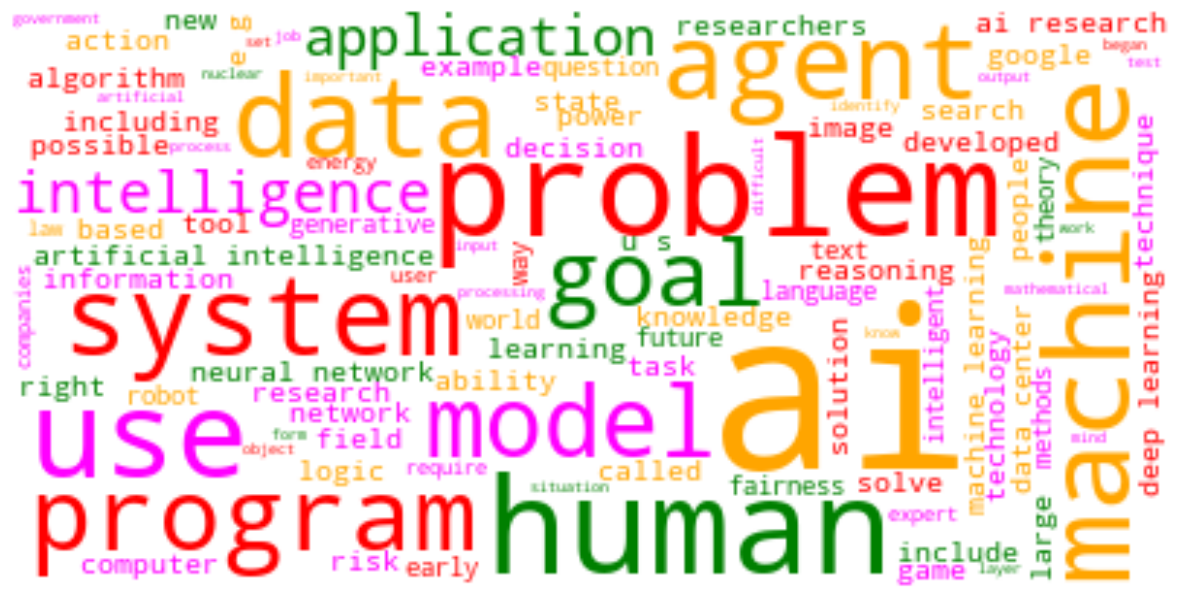

In [38]:
cloud = cloud.generate(' '.join(no_stop_words))
plt.figure(figsize=(15, 15))
plt.imshow(cloud, interpolation='bilinear')
plt.axis('off')
plt.show()